<center><font style="font-size:16pt; font-weight: bold">
Time and Space Transformations
</font>
</center>

<center><font style="font-size:16pt">
Wednesday, May 22nd, 9:00-9:50 and 10:05-10:55 Mountain Time
</font>
</center>

# 1. Overview

Target audience: Students with limited experience with

* manipulation and transformation of time representations and
* transforming data between Heliophysics coordinate frames

Examples are given using native Python libraries and PyHC packages.

<details>
    <summary>
        Python expereince survey results
    </summary>
    <img src="tmp/python-experience.png" width="100%">
</details>
<br>

The objective of this session is for students to
* learn about different options for common Heliophysics problems related to time and coordinate systems and
* try problems, ask questions, and hear answers and opinions from more advanced PyHC developers.

# 2. Outline

This is a self-guided working session. Students should read the introductory notes, attempt problems, and ask questions.

You are encouraged to work in groups - you will learn significantly more during this session if you do.

1. (30 min) Students work in groups on problems of their choosing. Students are welcome to create their own problems and attempt to answer them. Instructors will circulate and answer questions in person and on Zoom/[Slack](https://app.slack.com/client/T03DQV5ABMJ/C03ECBLC49W).
2. (20 min) Wrap-up - Instructor comments on common questions and asks selected groups to present their solution by screen sharing in Zoom. There will also be an opportunity to compare student approaches.

# 3. Time

_9:05-9:55 Mountain Time_

Most PyHC packages use, in some way, one or more of `datetime`, Pandas, or NumPy for time representations. Some packages extend the functionality `datetime` and NumPy, for example SpacePy's `TickTock` and AstroPy's `Time` (also used by SunPy).

## 3.1 Parsing and Formatting

### 3.1.1 Parsing - Known Time String Format

The most common task is to parse an [ISO 8601](https://en.wikipedia.org/wiki/ISO_8601) time string into a Python `datetime` object. (`datetime` can also parse non--ISO 8601 time strings).

If you know the format of the time string and it has microsecond precision or less, a reliable approach it to use [`datetime.strptime`](https://docs.python.org/3/library/datetime.html). For example,

In [1]:
import datetime 
dt = datetime.datetime.strptime("2008-09-03T20:56:35.450686Z", "%Y-%m-%dT%H:%M:%S.%fZ")
print(dt)

2008-09-03 20:56:35.450686


In [2]:
dt = datetime.datetime.strptime("2008-09-03T20:56:35.450Z", "%Y-%m-%dT%H:%M:%S.%fZ")
print(dt)

2008-09-03 20:56:35.450000


In [3]:
dt = datetime.datetime.strptime("2008-09-03T20:56:35Z", "%Y-%m-%dT%H:%M:%SZ")
print(dt)

2008-09-03 20:56:35


In [4]:
dt = datetime.datetime.strptime("2008-09-03T20:56:35.Z", "%Y-%m-%dT%H:%M:%S.Z")
print(dt)

2008-09-03 20:56:35


In [5]:
dt = datetime.datetime.strptime("2008-002T20:56:35.450686Z", "%Y-%jT%H:%M:%S.%fZ")
print(dt)

2008-01-02 20:56:35.450686


### 3.1.2 Formatting

See https://docs.python.org/3/library/datetime.html#format-codes for a table of time format codes.

In [122]:
import datetime 
dt = datetime.datetime.strptime("2008-09-03T20:56:35.450686Z", "%Y-%m-%dT%H:%M:%S.%fZ")
print(dt.strftime('The date is %Y/%m/%d; the time is %H:%M:%S.%f'))

# The format string can have the line break (\n).
import datetime 
dt = datetime.datetime.strptime("2008-09-03T20:56:35.450686Z", "%Y-%m-%dT%H:%M:%S.%fZ")
print(dt.strftime('%m/%d\n%Y'))

The date is 2008/09/03; the time is 20:56:35.450686
09/03
2008


**<span style="background-color:yellow">Problems</span>**

1. Write a program that uses the output of

   ```
   datetime.datetime.strptime("2008-002T20:56:35.450686Z", "%Y-%jT%H:%M:%S.%fZ")
   ```

   and prints `01/02/2008 at 20:56:35.450686`. (You will need to refer to the [`datetime`](https://docs.python.org/3/library/datetime.html) documentation.) You program should work for any time string that has the form of the given string.

2. Describe a plan for solving the previous problem without using `datetime`.

### 3.1.3 Appendix - Parsing with Unknown Time String Format

(_This section is advanced and should be skipped unless you would like to contribute your answer to the problem in this section._)

[ISO 8601](https://en.wikipedia.org/wiki/ISO_8601) is a complex standard. If you have to parse a time string and don't know its format beyond "ISO 8601", you are likely to run into issues because not all packages fully implement the standard. For example, `pandas.to_datetime('2001-001T00Z')` fails.

Parsers in the PyHC community:

* [SunPy's `parse_time`](https://docs.sunpy.org/en/stable/how_to/parse_time.html)
* [AstroPy's `Time`](https://docs.astropy.org/en/stable/api/astropy.time.Time.html#astropy.time.Time)
* [SpacePy's `Ticktock`](https://spacepy.github.io/autosummary/spacepy.time.Ticktock.html)

Some code samples:

* [SpacePy's time.py](https://github.com/spacepy/spacepy/blob/main/spacepy/time.py#L1931)
* [`hapiclient`'s hapitime.py](https://github.com/hapi-server/client-python/blob/master/hapiclient/hapitime.py#L166)

References

* A comprehensive list of Python packages that deal with [ISO 8601](https://en.wikipedia.org/wiki/ISO_8601) at https://github.com/closeio/ciso8601
* https://stackoverflow.com/questions/127803/how-do-i-parse-an-iso-8601-formatted-date-and-time
* https://wiki.python.org/moin/WorkingWithTime

**<span style="background-color:yellow">Problem</span>**

Suppose you are asked to write a function that takes an input of an [ISO 8601](https://en.wikipedia.org/wiki/ISO_8601) formatted time string and produces an output of a `datetime` object. How would you approach the problem? What tests would you use? How would you handle errors?



## 3.2 Generating

A common task is to generate a list of timestamps. The following example uses

* `datetime()`
* `pandas.date_range()`
* `datetime64` values
* `spacepy.time.tickrange()`

To generate a list of 10 days.

In [16]:
from datetime import datetime, timedelta

time_str_start = '2022-02-01T00:00:00Z'
time_str_end = '2022-02-10T00:00:00Z'
time = datetime.fromisoformat(time_str_start[0:-1])
print(f'Start: {time_str_start}')
print(f'End:   {time_str_end}')

print(40*"-" + "\ndatetime.timedelta\n" + 40*"-")
delta = timedelta(days=1)
for i in range(10):
  print(time)
  time += delta
# or time = [time + delta for i in range(10)]

Start: 2022-02-01T00:00:00Z
End:   2022-02-10T00:00:00Z
----------------------------------------
datetime.timedelta
----------------------------------------
2022-02-01 00:00:00
2022-02-02 00:00:00
2022-02-03 00:00:00
2022-02-04 00:00:00
2022-02-05 00:00:00
2022-02-06 00:00:00
2022-02-07 00:00:00
2022-02-08 00:00:00
2022-02-09 00:00:00
2022-02-10 00:00:00


In [17]:
print(40*"-" + "\npandas.date_range\n" + 40*"-")
# https://pandas.pydata.org/docs/reference/api/pandas.date_range.html
import numpy as np
import pandas as pd
timestamp_range = pd.date_range(start=time_str_start, end=time_str_end)
for time in timestamp_range:
  #print(time.to_datetime64().astype(np.int64))
  print(time.to_pydatetime())

----------------------------------------
pandas.date_range
----------------------------------------
2022-02-01 00:00:00+00:00
2022-02-02 00:00:00+00:00
2022-02-03 00:00:00+00:00
2022-02-04 00:00:00+00:00
2022-02-05 00:00:00+00:00
2022-02-06 00:00:00+00:00
2022-02-07 00:00:00+00:00
2022-02-08 00:00:00+00:00
2022-02-09 00:00:00+00:00
2022-02-10 00:00:00+00:00


In [18]:
# https://numpy.org/doc/stable/reference/arrays.datetime.html
print(40*"-" + "\nNumPy datetime64\n" + 40*"-")
time_o = np.array('2022-02-02T00:00:00', dtype='datetime64[D]')
times = np.arange(time_o, time_o + 10, dtype='datetime64[D]')
for time in times:
  print(time)

----------------------------------------
NumPy datetime64
----------------------------------------
2022-02-02
2022-02-03
2022-02-04
2022-02-05
2022-02-06
2022-02-07
2022-02-08
2022-02-09
2022-02-10
2022-02-11


In [19]:
# https://spacepy.github.io/autosummary/spacepy.time.tickrange.html#spacepy.time.tickrange
print(40*"-" + "\nspacepy.time.tickrange\n" + 40*"-")
import spacepy.time
times = spacepy.time.tickrange(time_str_start, time_str_end, deltadays=1, dtype=None)
for time in times:
  print(time.UTC[0])

----------------------------------------
spacepy.time.tickrange
----------------------------------------
2022-02-01 00:00:00
2022-02-02 00:00:00
2022-02-03 00:00:00
2022-02-04 00:00:00
2022-02-05 00:00:00
2022-02-06 00:00:00
2022-02-07 00:00:00
2022-02-08 00:00:00
2022-02-09 00:00:00
2022-02-10 00:00:00


**<span style="background-color:yellow">Problem</span>**

Using any library^, generate a `list` of `datetime` objects that start on `2024-01-01T00:00:00Z`, increments by one hour, and ends after a user-specified number of hours. You code should work for any user-specified end timestamp in the form `2022-02-01T00:00:00Z`. Be prepared to discuss the advantages/disadvantages of your approach. (Recall that in the [SunPy tutorial from Monday](https://github.com/heliophysicsPy/summer-school-24/blob/main/sunpy-tutorial/sunpy-tutorial/part-1-sunpy-instructor-version.ipynb) (search on "Aside - astropy.time.Time"), a related example was given).

^Use `!pip list` in a Notebook to see available packages (the `!` executes the command that follows as a shell command). To install a package, use `!pip install PACKAGE` in your Jupyter Notebook.

<span style="background-color:yellow">**Answer**</span>

In [123]:
import numpy as np
import astropy.units as u
from astropy.time import Time

n = 10
timeo = Time("2024-01-01T00:00:00Z", scale='utc', format='isot', precision=9)
times = timeo + np.arange(10) * u.hour
print(times.to_datetime())

[datetime.datetime(2024, 1, 1, 0, 0) datetime.datetime(2024, 1, 1, 1, 0)
 datetime.datetime(2024, 1, 1, 2, 0) datetime.datetime(2024, 1, 1, 3, 0)
 datetime.datetime(2024, 1, 1, 4, 0) datetime.datetime(2024, 1, 1, 5, 0)
 datetime.datetime(2024, 1, 1, 6, 0) datetime.datetime(2024, 1, 1, 7, 0)
 datetime.datetime(2024, 1, 1, 8, 0) datetime.datetime(2024, 1, 1, 9, 0)]


## 3.3 Transforming

PyHC packages that implement time transformations include

1. [SpacePy](https://spacepy.github.io/time.html)
2. SunPy (primarily uses [AstroPy](https://docs.astropy.org/en/stable/api/astropy.time.Time.html#astropy.time.Time)); see also the [2022](
https://github.com/heliophysicsPy/summer-school/blob/main/sunpy-tutorial/part-3-coordinates.ipynb) or [2024](https://github.com/heliophysicsPy/summer-school-24/blob/main/sunpy-tutorial/sunpy-tutorial/part-1-sunpy-instructor-version.ipynb) PyHC Summer School SunPy tutorials.

### 3.3.1 SpacePy

**Basic usage**

In [124]:
import spacepy.time

time_string = '2000-03-20T12:06:40Z'
time =  spacepy.time.Ticktock(time_string, 'ISO')
tai = time.convert('TAI')
print(tai)

Ticktock( [1.33224523e+09], dtype=TAI)


**Explore options**

Print `time_string` in different systems available in SpacePy. Note that SpacePy refers to "systems"; AstroPy has some as "formats" and others as "scales".

In [126]:
systems = ['CDF', 'ISO', 'UTC', 'TAI', 'GPS', 'UNX', 'JD', 'MJD', 'RDT', 'GPS', 'APT']
print(f"\nTime: {time_string}\n")
print(f"System   Value")
print(f"------------------------------------------")
for system in systems:
  print(f'{system:3s}      {time.convert(system)}')


Time: 2000-03-20T12:06:40Z

System   Value
------------------------------------------
CDF      Ticktock( [6.31207732e+13], dtype=CDF)
ISO      Ticktock( ['2000-03-20T12:06:40'], dtype=ISO)
UTC      Ticktock( [datetime.datetime(2000, 3, 20, 12, 6, 40)], dtype=UTC)
TAI      Ticktock( [1.33224523e+09], dtype=TAI)
GPS      Ticktock( [6.37589213e+08], dtype=GPS)
UNX      Ticktock( [9.53554e+08], dtype=UNX)
JD       Ticktock( [2451624.00462963], dtype=JD)
MJD      Ticktock( [51623.50462963], dtype=MJD)
RDT      Ticktock( [730199.50462963], dtype=RDT)
GPS      Ticktock( [6.37589213e+08], dtype=GPS)
APT      Ticktock( [6.37589213e+08], dtype=APT)


### 3.3.2 AstroPy

**Basic usage**

See also https://docs.astropy.org/en/stable/time/index.html#id6 and the [SunPy tutorial from Monday](https://github.com/heliophysicsPy/summer-school-24/blob/main/sunpy-tutorial/sunpy-tutorial/part-1-sunpy-instructor-version.ipynb) (search on "Aside - astropy.time.Time").

In [27]:
from astropy.time import Time

time_string = '2000-03-20T12:06:40'
time_object = Time(time_string, scale='utc', precision=9)
print(time_object.isot)

2000-03-20T12:06:40.000000000


**Explore options**

In [31]:
time_string = '2000-03-20T12:06:40Z'
time_object = Time(time_string, precision=9)

# Print all formats and scales for t
print(f"\nTime: {time_object}\n")
maxlen = max([len(f) for f in list(Time.FORMATS.keys())])
print(f"Format        Scale Value")
print(f"------------------------------------------")
for FORMAT in [*list(Time.FORMATS.keys()),'jd1','jd2']:
  for SCALE in Time.SCALES:
    if SCALE == 'local': continue
    # Set scale. time_object = getattr(time_object, SCALE) is equivalent to
    #    time_object = time_object.SCALE
    # where SCALE is one of scales listed at
    # https://docs.astropy.org/en/stable/time/index.html#id6
    time_object = getattr(time_object, SCALE)

    # Set format. getattr(t, FORMAT) is equivalent to doing
    #    t = Time(time_string)
    #    val = t.format
    # where FORMAT is one of the formats listed at
    # https://docs.astropy.org/en/stable/time/#time-format
    val = getattr(time_object, FORMAT)

    print(f"{FORMAT:13} {SCALE:5} {val}") # https://docs.astropy.org/en/stable/time/#id6


Time: 2000-03-20T12:06:40.000000000

Format        Scale Value
------------------------------------------
jd            tai   2451624.005
jd            tcb   2451624.0055039953
jd            tcg   2451624.0053784098
jd            tdb   2451624.005372518
jd            tt    2451624.0053725
jd            ut1   2451624.0046329196
jd            utc   2451624.0046296297
mjd           tai   51623.505
mjd           tcb   51623.50550399557
mjd           tcg   51623.505378409616
mjd           tdb   51623.50537251841
mjd           tt    51623.5053725
mjd           ut1   51623.50463291946
mjd           utc   51623.50462962963
decimalyear   tai   2000.2172267759563
decimalyear   tcb   2000.2172281529934
decimalyear   tcg   2000.2172278098624
decimalyear   tdb   2000.2172277937661
decimalyear   tt    2000.217227793716
decimalyear   ut1   2000.217225773004
decimalyear   utc   2000.2172257640154
unix          tai   953554000.0
unix          tcb   953554000.0
unix          tcg   953554000.0
unix     

**<span style="background-color:yellow">Problems</span>**

See https://docs.astropy.org/en/stable/time/index.html#id6 for explanations of time scales (e.g., TAI, UT1).

1. Use AstroPy to test the claim that epoch J2000.0, defined as January 1st, 2000 at noon Terrestrial Time, corresponds to
   * Julian date 2451545.0 Terrestrial Time
   * 2000-01-01 11:59:27.816 TAI, and
   * 2000-01-01 11:58:55.816 UTC.
2. Use AstroPy to test any one of the following claims (from [Wikipedia article on Time_standard](https://en.wikipedia.org/wiki/Time_standard#Current_time_standards))
   * UTC differs from TAI by an integral number of seconds. 
   * UTC is kept within 0.9 second of UT1 by the introduction of one-second steps to UTC, the "leap second".
   * To date these steps (and difference "TAI-UTC") have always been positive.


**<span style="background-color:yellow">Answers</span>**

In [95]:
# Problem 1
# Julian date 2451545.0 TT (Terrestrial Time), 2000 January 1 noon TT, 2000 January 1 11:59:27.816 TAI, and 2000 January 1 11:58:55.816 UTC.

time_object = Time(2451545.0, scale='tt', format='jd', precision=9)
print(time_object.isot)

time_object = Time('2000-01-01T11:59:27.816', scale='tai', format='isot', precision=9)
print(time_object.tt)

time_object = Time('2000-01-01T11:58:55.816', scale='utc', format='isot', precision=9)
print(time_object.tt)

#2000-01-01T12:00:00.000000000
#2000-01-01T12:00:00.000000000
#2000-01-01T12:00:00.000000000

2000-01-01T12:00:00.000000000
2000-01-01T12:00:00.000000000
2000-01-01T12:00:00.000000000


In [98]:
# Problem 2

time_string = "1999-01-01T12:00:00"

tai = Time(time_string, scale='tai', format='isot', precision=9)

utc = Time(time_string, scale='utc', format='isot', precision=9)

ut1 = Time(time_string, scale='ut1', format='isot', precision=9)

print((utc-tai)*86400)
print((utc-ut1)*86400)

#31.999999999998607
#0.7162161074422357

31.999999999998607
0.7162161074422357


## 3.4 Plotting

The default tick labels dates and time for Matplotlib usually require manually modification. For example, consider the following

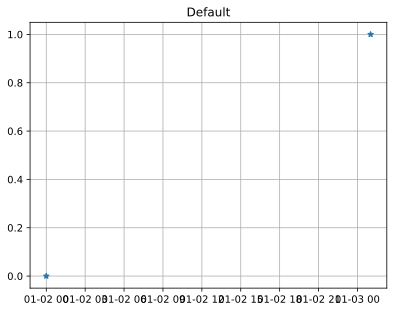

In [25]:
%config InlineBackend.figure_formats = ['svg']

import matplotlib.pyplot as plt
import datetime

dt1 = datetime.datetime(2011, 1, 2)
dt2 = dt1 + datetime.timedelta(days=1, hours=1, minutes=1)
x = [dt1, dt2]
y = [0.0,1.0]

plt.plot(x, y,'*')
plt.title('Default')
plt.grid()
#plt.gcf().autofmt_xdate() # Gives a slight improvement, but one rarely sees this style in journals.

In this tutorial, we provide examples of code that are a starting point for manually modifying tick labels.

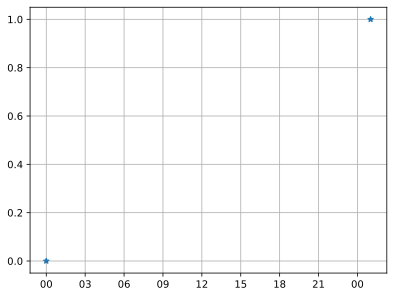

In [26]:
plt.figure()
plt.plot(x, y,'*')
plt.grid()
ax = plt.gca()

import matplotlib.dates as mpld

# A "locator" is used to indicate the locations for the major ticks.
# In the following, we indicate that we want major ticks every three hours.
major_locator = mpld.HourLocator(byhour=list(range(0, 24, 3)) )

# A "formatter is used to format the value of the label for the major tick
# In the following, we indicate that we want only to show the hour.
major_formatter = mpld.DateFormatter('%H')

ax.xaxis.set_major_formatter(major_formatter)
ax.xaxis.set_major_locator(major_locator)

The following code is the same as above except we extend the range so there is a tick label after the last data point (last line of code).

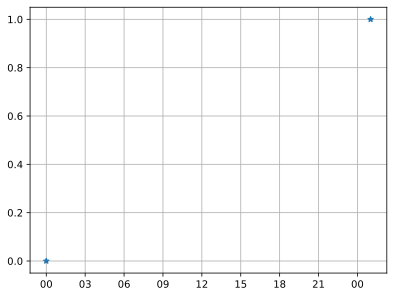

In [27]:
plt.figure()
plt.plot(x, y,'*')
plt.grid()
ax = plt.gca()

# A locator is used to indicate the locations for the major ticks.
# In the following, we indicate that we want major ticks ever three hours.
major_locator = mpld.HourLocator(byhour=list(range(0, 24, 3)) )

# A formatter is used to format the value of the label for the major tick
# In the following, we indicate that we want only to show the hour.
major_formatter = mpld.DateFormatter('%H')

ax.xaxis.set_major_formatter(major_formatter)
ax.xaxis.set_major_locator(major_locator)
# Modify the x limits
#ax.set_xlim([datetime.datetime(2011, 1, 1, 21), datetime.datetime(2011, 1, 3, 3)]);

**<span style="background-color:yellow">Problems</span>**

1. The following program uses a custom `FuncFormatter` function to format labels. The input to `func_formatter` is a Matplotlib fractional date and the index of the label. `func_formatter` is set to produce the same labels as the previous plot. Modify `func_formatter` so the following labels are produced. Note that a newline (`\n`) can be used in the string passed to `strftime()`.

<img src="tmp/desired-result.png" width="300px"/>

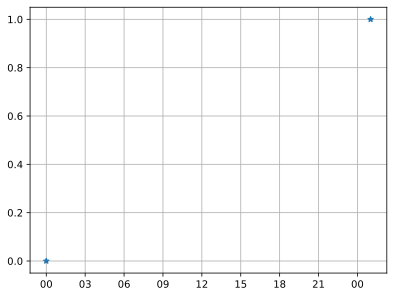

In [28]:
import matplotlib as mpl
def func_formatter(mpldn, pos=None):
    # Modify this function to produce the above figure.
    #print(mpldn, pos)
    #print(mpl.dates.num2date(mpldn), pos)
    dt = mpl.dates.num2date(mpldn)
    return dt.strftime('%H')

plt.figure()
plt.plot(x, y,'*')
plt.grid()
ax = plt.gca()
ax.xaxis.set_major_formatter(mpl.dates.ticker.FuncFormatter(func_formatter))

2. You are asked to produce a plot with `figsize=(3, 6)` in the following. Make the x-axis labels presentable.

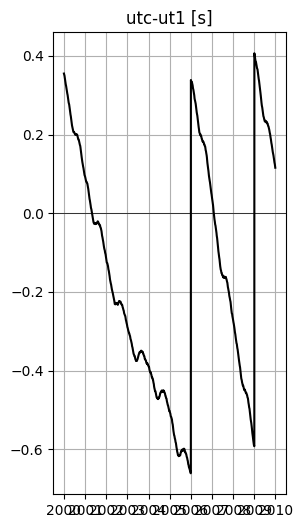

In [127]:
from astropy.time import Time
import astropy.units as u
import numpy as np

n = 365*10
timeo = Time("2000-01-01T12:00:00Z", scale='utc', format='isot', precision=9)
times = timeo + np.arange(n) * u.day
#print(times.to_datetime())

utc = Time(times, scale='utc', precision=9)
ut1 = Time(times.to_datetime(), scale='ut1', precision=9)

#print(utc)
#print(ut1)
#print((utc-ut1)*86400)
from matplotlib import pyplot as plt
plt.figure(figsize=(3, 6)) # do not modify figsize
plt.plot(times.to_datetime(), ((utc-ut1)*86400).value, 'k');
# Compare with https://upload.wikimedia.org/wikipedia/commons/f/fb/Leapsecond.ut1-utc.svg
xlim = plt.gca().get_xlim()
plt.plot(xlim, [0,0],'k-', lw=0.5)
plt.gca().set_xlim(xlim)
plt.grid()
plt.title('utc-ut1 [s]');

Additional notes on plotting.

Although Matplotlib [has documentation for handling date labels](https://matplotlib.org/stable/api/dates_api.html), it is often easier to look at how others handle this.

* [SpacePy `utils.py`](https://github.com/spacepy/spacepy/blob/main/spacepy/plot/utils.py#L633)
* [hapiplot `datetick.py`](https://github.com/hapi-server/plot-python/blob/main/hapiplot/plot/datetick.py) (SpacePy's code was used as a starting point; did not want to require all of SpacePy just for labeling axes. Note that it also does not make sense to have others require `hapiplot` if one wants to use the code in `datetick.py`. As a result, a new package is being developed: https://github.com/rweigel/datetick that will eventually be available as from PyPi.)
* [GeospaceLab `axis_ticks.py`](https://github.com/JouleCai/geospacelab/blob/master/geospacelab/visualization/mpl/axis_ticks.py) (Code appears cleaner than what is in `datetick.py` and uses newer features of Matplotlib.)
* [pytplot](https://pypi.org/project/pytplot-mpl-temp/)

# 4. Space

Three main approaches:

1. Custom library: SpacePy, SunPy, etc. More often used by scientists.
2. SPICE: Not covered; more often used by instrument teams. Wrappers to SPICE Fortran library in many languages. In Python, there is SpiceyPy.
3. Web site, e.g.
   * [LAMBDA](https://lambda.gsfc.nasa.gov/toolbox/converters.html)
   * [TREPS](https://treps.irap.omp.eu/)
   * [Geomagnetic Coordinate Calculator](https://geomag.bgs.ac.uk/data_service/models_compass/coord_calc.html)
   * [AACGM-v2 Coordinate Transformations](https://sdnet.thayer.dartmouth.edu/aacgm/aacgm_calc.php)
   * [NOAA Magnetic Field Calculators](https://www.ngdc.noaa.gov/geomag/calculators/magcalc.shtml)
   * [Kyoto Geographic <=> Geomagnetic (IGRF)](https://wdc.kugi.kyoto-u.ac.jp/igrf/gggm/)

A useful reference for magnetosphere coordinate frames: https://www.spenvis.oma.be/help/background/coortran/coortran.html

### SpacePy

In [84]:
import spacepy.coordinates as sc
from spacepy.time import Ticktock

ticks = Ticktock(['1997-01-01T00:00:00'], 'ISO')
input = sc.Coords([0,0,1], 'MAG', 'car', ticks=ticks)
print(input)

output = input.convert('GSM', 'car')
print(output)

Coords( [[0.0, 0.0, 1.0]] , 'CDMAG', 'car')
Coords( [[-0.4355749701451781, -1.0791649920517188e-05, 0.900152456679738]] , 'GSM', 'car')


In [103]:
# Transform a vector at more than one time
import numpy.matlib
import spacepy.time

times = spacepy.time.tickrange('1997-01-01T00:00:00Z', '1997-01-03T00:00:00Z', deltadays=1)

vectors = np.matlib.repmat(np.array([0, 0, 1]), len(times), 1)

input = sc.Coords(vectors, 'MAG', 'car', ticks=Ticktock(times))
output = input.convert('GSM', 'car')
print(output)

Coords( [[-0.4355749701451781, -1.0791649920517188e-05, 0.900152456679738], [-0.4339331535065364, -1.175700574616656e-05, 0.9009450694407763], [-0.4321762214647468, -1.271152670564908e-05, 0.9017891734983687]] , 'GSM', 'car')


### SunPy

In [29]:
import astropy.coordinates
import sunpy.coordinates

#  SunPy uses long names for coordinate frame names. Here is a mapping from SpacePy names.
#  "GEI": "geocentricearthequatorial",
#  "GSE": "geocentricsolarecliptic",
#  "GSM": "geocentricsolarmagnetospheric",
#  "GEO": "itrs",
#  "SM":  "solarmagnetic",
#  "MAG": "geomagnetic"

time = "1997-01-01T00:00:00"

R_E = astropy.constants.R_earth
kwargs = {
  "x": 0*R_E,
  "y": 0*R_E,
  "z": 1*R_E,
  "frame": "geomagnetic",
  "obstime": time,
  "representation_type": "cartesian"
}

coord_in = astropy.coordinates.SkyCoord(**kwargs)

coord_out = coord_in.transform_to("geocentricsolarmagnetospheric").cartesian/R_E
print(coord_out)

(-0.43562548, 0., 0.90012802) 


In [68]:
# Transform a vector at more than one time
times = spacepy.time.tickrange('1997-01-01T00:00:00Z', '1998-01-01T00:00:00Z', deltadays=1)
kwargs = {
  "x": 0*R_E,
  "y": 0*R_E,
  "z": R_E,
  "frame": "geomagnetic",
  "obstime": '1997-01-01T00:00:00Z',
  "representation_type": "cartesian"
}

import numpy as np
for time in times:
    kwargs['obstime'] = time.getISO()
    coord_in = astropy.coordinates.SkyCoord(**kwargs)
    coord_out = coord_in.transform_to("geocentricsolarmagnetospheric").cartesian/R_E
    #print(coord_out.xyz[2].value)
    angle = np.arccos(coord_out.xyz[2].value)
    print(time.getISO(), angle*180/np.pi)

['1997-01-01T00:00:00'] [95.63195725]
['1997-01-02T00:00:00'] [95.56833731]
['1997-01-03T00:00:00'] [95.504824]
['1997-01-04T00:00:00'] [95.44149121]
['1997-01-05T00:00:00'] [95.37840968]
['1997-01-06T00:00:00'] [95.31564729]
['1997-01-07T00:00:00'] [95.25326942]
['1997-01-08T00:00:00'] [95.19133872]
['1997-01-09T00:00:00'] [95.1299148]
['1997-01-10T00:00:00'] [95.0690535]
['1997-01-11T00:00:00'] [95.00880561]
['1997-01-12T00:00:00'] [94.94921561]
['1997-01-13T00:00:00'] [94.89032038]
['1997-01-14T00:00:00'] [94.83214878]
['1997-01-15T00:00:00'] [94.77472178]
['1997-01-16T00:00:00'] [94.71805278]
['1997-01-17T00:00:00'] [94.66214772]
['1997-01-18T00:00:00'] [94.607006]
['1997-01-19T00:00:00'] [94.55262108]
['1997-01-20T00:00:00'] [94.49898038]
['1997-01-21T00:00:00'] [94.44606631]
['1997-01-22T00:00:00'] [94.39385606]
['1997-01-23T00:00:00'] [94.34232229]
['1997-01-24T00:00:00'] [94.29143376]
['1997-01-25T00:00:00'] [94.24115506]
['1997-01-26T00:00:00'] [94.19144715]
['1997-01-27T00:00

**<span style="background-color:yellow">Problem</span>**

1. The dipole tilt is a key parameter in solar wind/magnetosphere coupling. It is defined as the angle between the z-axis in the MAG coordinate frame and the z-axis in the GSM coordinate frame. Using either SpacePy or SunPy, compute the dipole tilt over the course of one year.

2. The MAG coordinate frame has it's z-axis aligned with a dipole approximation of Earth's internal magnetic field. The location of the MAG coordinate frame's z-axis varies with time in the GEO (Geographic) frame. At https://www.spenvis.oma.be/help/background/coortran/coortran.html, Table 2. shows the location of the centred dipole north pole in geographic coordinates. Using either SpacePy or SunPy, see if you can reproduce any of the values in this table.

In [89]:
# Transform a vector at more than one time
times = spacepy.time.tickrange('1995-01-01T00:00:00Z', '1995-01-02T00:00:00Z', deltadays=10)
kwargs = {
  "x": 0*R_E,
  "y": 0*R_E,
  "z": 1*R_E,
  "frame": "geomagnetic",
  "obstime": '1997-01-01T00:00:00Z',
  "representation_type": "cartesian"
}

import numpy as np
for time in times:
    kwargs['obstime'] = time.getISO()
    coord_in = astropy.coordinates.SkyCoord(**kwargs)
    coord_out = coord_in.transform_to("itrs").cartesian/R_E
    print(coord_out)
    angle = np.arccos(coord_out.xyz[2].value)
    print(time.getISO(), angle*180/np.pi)

xyz = coord_out.xyz.value
print(xyz)

phi = (180/np.pi)*np.arctan(xyz[1]/xyz[0])
print(phi)

s = np.sqrt(xyz[0]**2 + xyz[1]**2)
theta = (180/np.pi)*np.arctan(s/coord_out.xyz[2].value)
print(theta)    

[(0.05904336, -0.17560767, 0.98268806)] 
['1995-01-01T00:00:00'] [10.67674828]
[[ 0.05904336]
 [-0.17560767]
 [ 0.98268806]]
[-71.41616405]
[10.67674828]
